# Notebook Imports and pakages

#lost function # residual sum of square
#error function
#objective fucntion

In [387]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map
from sympy import symbols, diff
from math import log

%matplotlib inline

# Example 1 A simple cost function
## $f(x) = x ^ 2 + x+ 1$

In [388]:
def f(x):
    return x**2 + x + 1

In [389]:
#make data
#using numpy linespace
x_1 = np.linspace(start= - 3 , stop=3, num =500)

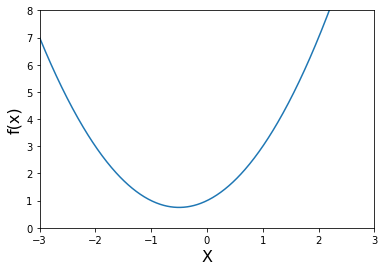

In [390]:
#plot the data
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X',  fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.plot(x_1, f(x_1))
plt.show()

# Slope and Derivatives

In [391]:
#calclus and derivitives  sperate topic 
def df(x):
    return 2 * x + 1

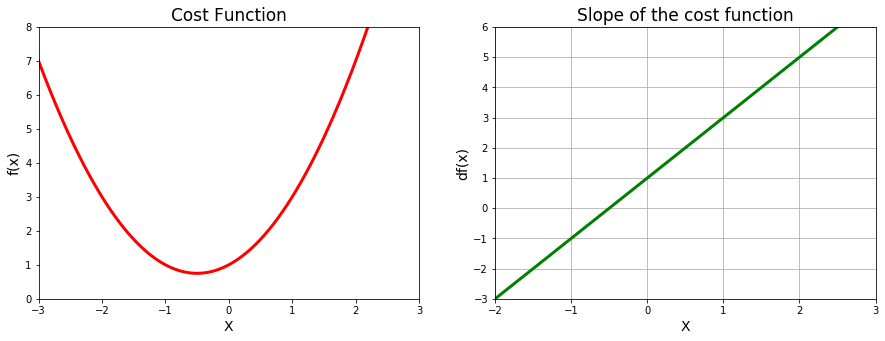

In [392]:
#plot the cost function
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
plt.xlim([-3,3])
plt.ylim(0,8)
plt.title('Cost Function', fontsize = 17)
plt.xlabel('X',  fontsize = 14)
plt.ylabel('f(x)', fontsize = 14)
plt.plot(x_1, f(x_1), color ='red', linewidth=3)


#second function of the Derivatives
plt.subplot(1,2,2)
plt.grid()
plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('X',  fontsize = 14)
plt.ylabel('df(x)', fontsize = 14)
plt.xlim([-2,3])
plt.ylim(-3,6)
plt.plot(x_1, df(x_1), color ='green', linewidth=3)

plt.show()

## Python loop and Gradient Decent

In [393]:
#for loop
for n in range(5):
    print('Hello World',n)
print('end of loop' )

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
end of loop


In [394]:
#while loop
counter = 0
while counter < 7:
    print('Counting ...', counter)
    counter +=1
print('ready or not here I come')

Counting ... 0
Counting ... 1
Counting ... 2
Counting ... 3
Counting ... 4
Counting ... 5
Counting ... 6
ready or not here I come


In [395]:
#Gradient decent 
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]


for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    
    step_size = abs(new_x - previous_x)
    if step_size < precision:
        print('loop run this many times:',n)
        break
    
print('Local minimum occurs at :', new_x )
print('Slope of df(x) value at this point :', df(new_x))
print('f(x) valur or cost at this point is :', f(new_x))

loop run this many times: 50
Local minimum occurs at : -0.49996003706460423
Slope of df(x) value at this point : 7.992587079153068e-05
f(x) valur or cost at this point is : 0.7500000015970362


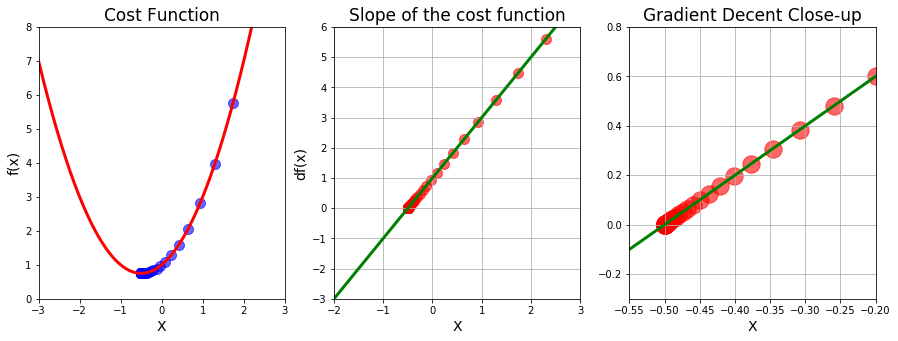

In [396]:
# super impose the gradient  decent calculation  plot the cost function
plt.figure(figsize = [15,5])
plt.subplot(1,3,1)
plt.xlim([-3,3])
plt.ylim(0,8)
plt.title('Cost Function', fontsize = 17)
plt.xlabel('X',  fontsize = 14)
plt.ylabel('f(x)', fontsize = 14)
plt.plot(x_1, f(x_1), color ='red', linewidth=3)

values = np.array(x_list)
plt.scatter(x_list,f(values), color='blue', s=100, alpha=0.6)

#second function of the Derivatives
plt.subplot(1,3,2)
plt.grid()
plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('X',  fontsize = 14)
plt.ylabel('df(x)', fontsize = 14)
plt.xlim([-2,3])
plt.ylim(-3,6)

plt.plot(x_1, df(x_1), color ='green', linewidth=3)
plt.scatter(x_list,slope_list , color='red', s=100, alpha=0.6)

# zooming in on the chart 
plt.subplot(1,3,3)
plt.title('Gradient Decent Close-up', fontsize = 17)
plt.xlabel('X',  fontsize = 14)
plt.grid()
#plt.ylabel('df(x)', fontsize = 14)
plt.xlim([-0.55, -0.2])
plt.ylim(-0.3,0.8)

plt.plot(x_1, df(x_1), color ='green', linewidth=3)
plt.scatter(x_list,slope_list , color='red', s=300, alpha=0.6)
plt.show()

# Example 2 0 Multiple minima vs  Initial Guess & Advances
## $$ g(x) = x^4 = 4x^2 + 5$$

In [397]:
#make some data
x_2 = np.linspace(-2,2, 1000)

#the g(x) function and the dg(x) function in python?

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8 * x

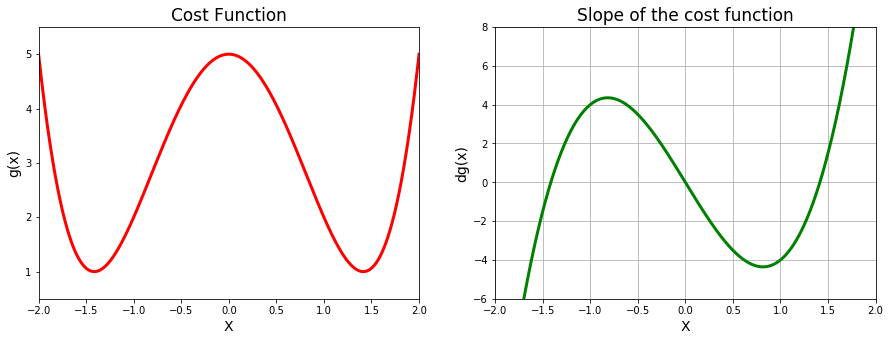

In [398]:
#plot the cost function
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim(0.5,5.5)

plt.title('Cost Function', fontsize = 17)
plt.xlabel('X',  fontsize = 14)
plt.ylabel('g(x)', fontsize = 14)
plt.plot(x_2, g(x_2), color ='red', linewidth=3)


#second function of the Derivatives
plt.subplot(1,2,2)
plt.grid()
plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('X',  fontsize = 14)
plt.ylabel('dg(x)', fontsize = 14)
plt.xlim([-2,2])
plt.ylim(-6,8)
plt.plot(x_2, dg(x_2), color ='green', linewidth=3)

plt.show()

## Gradient Decent as a pyhton function

In [399]:
#Gradient decent 
def gradient_decent(derivitive_func, initial_guess,  multiplier = 0.02,precision = 0.001, 
                    max_iter = 300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivitive_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivitive_func(previous_x)
        new_x = previous_x - multiplier * gradient

        x_list.append(new_x)
        slope_list.append(derivitive_func(new_x))


        step_size = abs(new_x - previous_x)
        if step_size < precision:
            break
    return new_x, x_list, slope_list 


In [400]:
local_min,list_x,deriv_list = gradient_decent(derivitive_func = dg , initial_guess= -0.1 )
print('Local min occurs at :',local_min)
print('Number of steps :',len(list_x))



Local min occurs at : -1.4120887490901561
Number of steps : 34


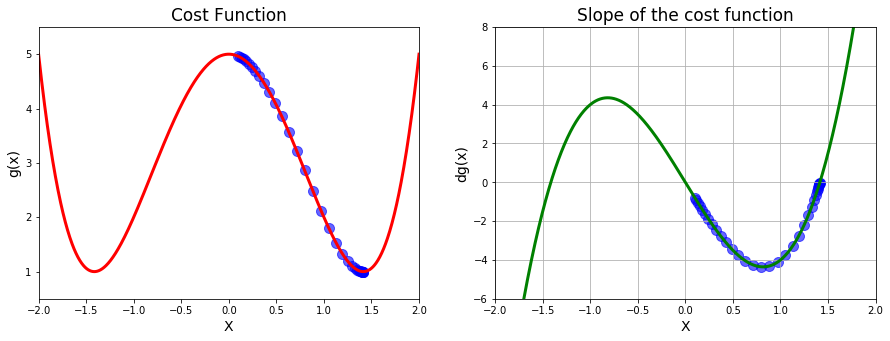

In [401]:
# calling gradient decent function

local_min,list_x,deriv_list = gradient_decent(derivitive_func = dg , initial_guess= 0.1 )


#plot the cost function
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim(0.5,5.5)

plt.title('Cost Function', fontsize = 17)
plt.xlabel('X',  fontsize = 14)
plt.ylabel('g(x)', fontsize = 14)
plt.plot(x_2, g(x_2), color ='red', linewidth=3)
plt.scatter(list_x, g(np.array(list_x)), color='blue', s=100, alpha=0.6)


#second function of the Derivatives
plt.subplot(1,2,2)
plt.grid()
plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('X',  fontsize = 14)
plt.ylabel('dg(x)', fontsize = 14)
plt.xlim([-2,2])
plt.ylim(-6,8)
plt.plot(x_2, dg(x_2), color ='green', linewidth=3)
plt.scatter(list_x, deriv_list ,color='blue', s=100, alpha=0.6)



plt.show()

##  Exmaple divergence, Overflow, Python Tuples 
## $$h(x) = x^5 - 2x^4 + 2$$

In [402]:
#make some data my np

x_3 = np.linspace(start = -2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3


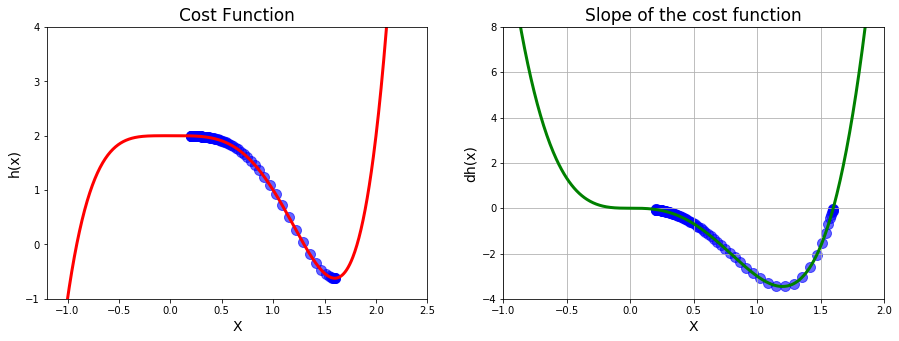

Local min occurs at : 1.5989534547394717
Cost of this min is : -0.6214287992331258
The number of step it takes : 117


In [403]:
# calling gradient decent function

local_min,list_x,deriv_list = gradient_decent(derivitive_func = dh, initial_guess= 0.2 )


#plot the cost function
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)

plt.xlim([-1.2,2.5])
plt.ylim(-1,4)

plt.title('Cost Function', fontsize = 17)
plt.xlabel('X',  fontsize = 14)
plt.ylabel('h(x)', fontsize = 14)
plt.plot(x_3, h(x_3), color ='red', linewidth=3)
plt.scatter(list_x, h(np.array(list_x)), color='blue', s=100, alpha=0.6)


#second function of the Derivatives
plt.subplot(1,2,2)
plt.grid()
plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('X',  fontsize = 14)
plt.ylabel('dh(x)', fontsize = 14)
plt.xlim([-1,2])
plt.ylim(-4,8)
plt.plot(x_3, dh(x_3), color ='green', linewidth=3)
plt.scatter(list_x, deriv_list ,color='blue', s=100, alpha=0.6)



plt.show()


print('Local min occurs at :',local_min)
print('Cost of this min is :',h(local_min))
print('The number of step it takes :',len(list_x))

In [404]:
# system  information
import sys
# help(sys)
# sys.version
#sys.float_info.max


 ## Python Tuples

In [405]:
# creating a tuple
#tuple can have a mix of data type and list are normal homogenous bets practices
#tuples are also imutable they cannot be changed.

breakfast =  'beacon','eggs', 'avocado'
luckynumber = 14,16,21,48,90

print(breakfast[2]+ " " + str(luckynumber[0]))


avocado 14


In [406]:
# unpacking sequence 
main,side,greens = breakfast

# The learning rate

In [407]:
## That does the leanring rate do in the algorythm.
## The  learning rwate does not change
## If your error rate is was reduced 
## Since the last iteration you can reduce the learning rate by 5 %
## If your error rate was increased you skiped over the optimal point.
## Reset to previos interation point and decrease the learning rate by 50%

# Example 4 Data viz with 3D Charts

## Minimise $$f(x,y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

#Minimise $$f(x,y)= \frac{1}{r + 1}$$ where $r$ is $3^{-x^2-y^2}$

In [408]:
def f(x,y):
    r = 3**(-x**2 -y**2)
    return 1 / (r +  1)

In [409]:
# Make some data for x and y variables

x_4 = np.linspace(start=-2,stop=2,num=200)
y_4 = np.linspace(start=-2,stop=2,num=200)

print('shape of X array', x_4.shape)

#numpy fucntion for converting two diamentional data from one dimetional data.
x_4,y_4 = np.meshgrid(x_4,y_4)

print('shape of X arra after meshgrid', x_4.shape)

shape of X array (200,)
shape of X arra after meshgrid (200, 200)


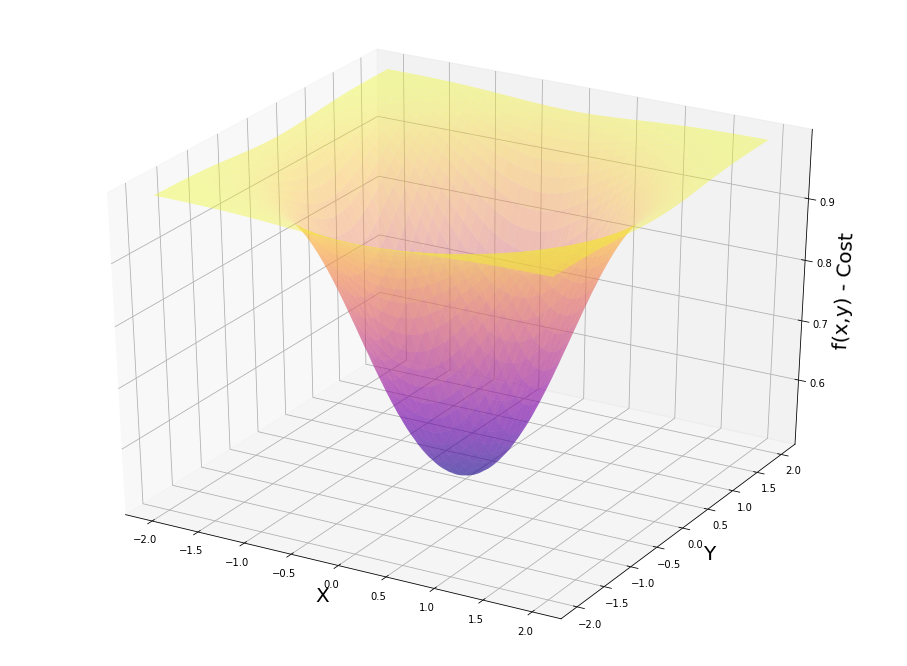

In [410]:
# Generating 3D plot
fig = plt.figure(figsize = [16,12])
ax = fig.gca(projection= '3d') 

ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('f(x,y) - Cost ', fontsize = 20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.plasma,alpha=0.4)
plt.show()

## Partial Derivative & Symbolic Computation
## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3)\cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + \right)^2} $$

## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3)\cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + \right)^2} $$

In [411]:
## using a deriviteve lab can help you eg symbolab
## Sympy is model

a,b = symbols('x,y')

print('Cost function f(x,y) is :', f(a,b))
print('Partial derivates x is :', diff( f(a,b),a))
print(' value of f(x,y)  {a:1.8, b:1.0} ',
      f(a,b).evalf(subs={a:1.8, b:1.0})) #python dictionary
print( 'The value of patial derivative (x,y)  {a:1.8, b:1.0}', 
      diff(f(a,b),a).evalf(subs = {a:1.8, b:1.0}))

Cost function f(x,y) is : 1/(3**(-x**2 - y**2) + 1)
Partial derivates x is : 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
 value of f(x,y)  {a:1.8, b:1.0}  0.990604794032582
The value of patial derivative (x,y)  {a:1.8, b:1.0} 0.0368089716197505


## Batch Gradienet Decent With Sympy

In [412]:
#set up.
multiplier = 0.1
max_iter = 500
params = np.array([1.8,1.0])  # initial guess.

for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs = {a:params[0], b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs = {a:params[0], b:params[1]})
    gradients = np.array([gradient_x,gradient_y]) 
    params = params - multiplier * gradients
    
# Results
print('values in gradient array', gradients)
print('Maximum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is  ',
      f(a,b).evalf(subs={a:params[0], b:params[1]}))



values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Maximum occurs at x value of: 3.45838599885832e-11
Minimum occurs at y value of: 1.92132555492129e-11
The cost is   0.500000000000000


In [413]:
## patial derivative functions

def fpx(x,y):
    r = 3**(-x**2 - y ** 2)
    return 2*x*log(3)*r / (r + 1)** 2
 
def fpy(x,y):
    r = 3**(-x**2 - y ** 2)
    return 2*y*log(3)*r / (r + 1)** 2
    

In [414]:
#set up.
multiplier = 0.1
max_iter = 500
params = np.array([1.8,1.0])  # initial guess.

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y]) 
    params = params - multiplier * gradients
    
# Results
print('values in gradient array', gradients)
print('Maximum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is  ',
      f(a,b).evalf(subs={a:params[0], b:params[1]}))



values in gradient array [2.01013038e-11 1.11673910e-11]
Maximum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is   0.500000000000000


## Graphing 3d Gradient Decent and Adv Numpy Arrays

In [415]:
#set up.
multiplier = 0.1
max_iter = 500
params = np.array([1.8,1.0])  # initial guess.
values_array = params .reshape(1,2)

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y]) 
    params = params - multiplier * gradients
    values_array = np.append(values_array, params.reshape(1,2), axis=0)
    
# Results
print('values in gradient array', gradients)
print('Maximum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is  ',
      f(a,b).evalf(subs={a:params[0], b:params[1]}))

print(values_array.shape)

values in gradient array [2.01013038e-11 1.11673910e-11]
Maximum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is   0.500000000000000
(501, 2)


In [416]:
# advance numpy array practice

kirk = np.array([['captain','Guitar']])
print(kirk.shape)

hs_band = np.array([['BlackLove','MC'], ['Questlove','Drums']])

the_roots = np.append(arr=hs_band,values=kirk, axis=0)

print('hs_band',hs_band[0])
print('hs_band',hs_band[0][1])
print('hs_band',hs_band[1][0])

# double layed object
print('the_roots', the_roots)


# useing a simple for loop to get all band members
for band in the_roots:
    name = band[0]
    print(name)
    
    
print('Printing nickNames...', the_roots[:, 0])

the_roots = np.append(arr=the_roots, values = [['malik b', 'MC']], axis=0) 

print('Printing nickNames...', the_roots[:,1])


(1, 2)
hs_band ['BlackLove' 'MC']
hs_band MC
hs_band Questlove
the_roots [['BlackLove' 'MC']
 ['Questlove' 'Drums']
 ['captain' 'Guitar']]
BlackLove
Questlove
captain
Printing nickNames... ['BlackLove' 'Questlove' 'captain']
Printing nickNames... ['MC' 'Drums' 'Guitar' 'MC']


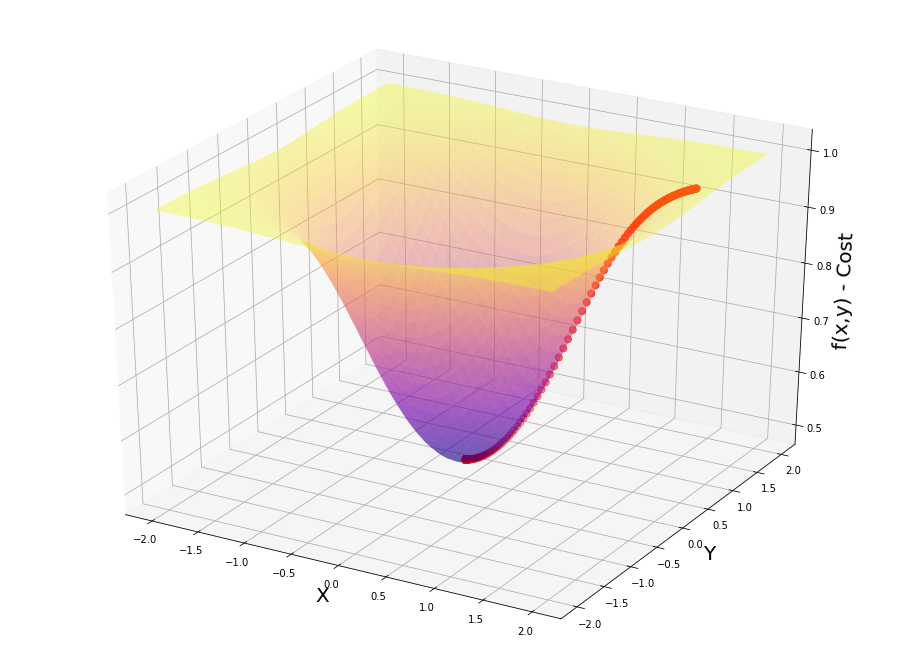

In [417]:
# Generating 3D plot
fig = plt.figure(figsize = [16,12])
ax = fig.gca(projection= '3d') 

ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('f(x,y) - Cost ', fontsize = 20)
    
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.plasma,alpha=0.4)
ax.scatter(values_array[:,0],values_array[:,1],
          f(values_array[:,0],values_array[:,1]),s=50, color='red')

plt.show()



